[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Hello-world/blob/master/Regress%C3%A3o_Quadratica.ipynb)

In [0]:
#Importação todos os pacotes utilizados
import pandas as pd
from google.colab import files
import io
from scipy import stats
from scipy.interpolate import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carregar o arquivo em csv
uploaded = files.upload()

Saving dados_experimentais_q.csv to dados_experimentais_q.csv


In [3]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O arquivo "dados_experimentais_q.csv" com tamanho de 79 bytes


In [0]:
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['dados_experimentais_q.csv'].decode('utf-8')))

In [6]:
#impressão do arquivo em data frame
calibracao_df

,eixo x,eixo y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [0]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values

In [8]:
#impressão do vetor
calibracao_np

array([[  0,   0],
       [  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [9]:
#vetor do eixo x
x = calibracao_np[:,0]
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [10]:
#vetor do eixo y
y = calibracao_np[:,1]
print(y)

[  0   1   4   9  16  25  36  49  64  81 100]


In [19]:
quad = np.polyfit(x, y, 2)
print(linear_p)

[ 1.00000000e+00 -1.54581017e-15 -7.09663376e-15]


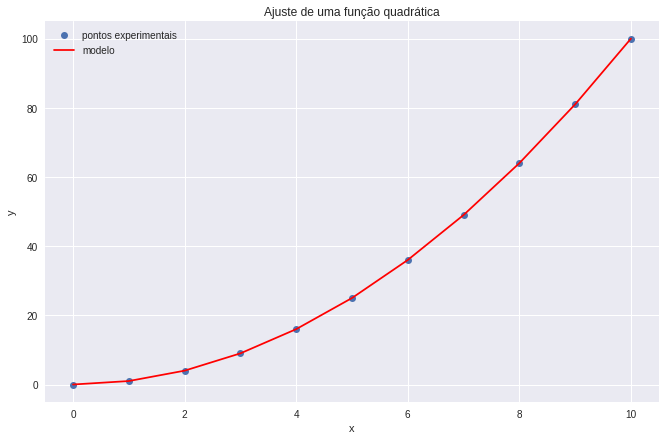

In [21]:
#impressão dos dados experimentais e do modelo linear
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, np.polyval(quad, x), "-r", label = "modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma função quadrática")
plt.legend()
plt.show()

In [22]:
# Calculo do coeficiente de correlação
yfit = quad[0] * (x*x) + quad[1]*x + quad[2] # calcula os valores preditos
yresid = y - yfit # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(y) * np.var(y) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação

print(R2) # imprime coeficiente de determinação

1.0
